In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [110]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/global-weather-repository")

print("Dataset downloaded to:", path)

Dataset downloaded to: C:\Users\nurka\.cache\kagglehub\datasets\nelgiriyewithana\global-weather-repository\versions\416


In [111]:
df = pd.read_csv(path + '/GlobalWeatherRepository.csv')

df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [112]:
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [113]:
selected = ['temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'uv_index']

training = df[selected]

training.head(5)

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,uv_index
0,26.6,Partly Cloudy,13.3,338,29.89,0.00,24,30,7.0
1,19.0,Partly cloudy,11.2,320,29.88,0.00,94,75,5.0
2,23.0,Sunny,15.1,280,29.85,0.00,29,0,5.0
3,6.3,Light drizzle,11.9,215,29.75,0.01,61,100,2.0
4,26.0,Partly cloudy,13.0,150,29.85,0.00,89,50,8.0


In [114]:
x_feat = [col for col in training.columns if col != 'condition_text']

X = training[x_feat]
y = training['condition_text']

In [115]:
y = y.str.lower()

y.unique()

array(['partly cloudy', 'sunny', 'light drizzle', 'clear', 'overcast',
       'moderate or heavy rain with thunder',
       'patchy light rain in area with thunder', 'fog',
       'patchy light rain with thunder', 'patchy rain nearby',
       'light rain', 'mist', 'cloudy', 'thundery outbreaks in nearby',
       'moderate rain', 'light rain shower', 'moderate rain at times',
       'moderate or heavy rain shower', 'heavy rain at times',
       'patchy light rain', 'patchy light drizzle',
       'thundery outbreaks possible', 'patchy rain possible',
       'moderate or heavy rain in area with thunder', 'heavy rain',
       'torrential rain shower', 'freezing fog',
       'moderate or heavy snow showers', 'light sleet', 'blizzard',
       'moderate snow', 'light snow', 'light sleet showers',
       'light freezing rain', 'heavy snow', 'blowing snow',
       'patchy heavy snow', 'light snow showers',
       'moderate or heavy sleet', 'patchy light snow'], dtype=object)

In [116]:
import requests

response = requests.get("https://www.weatherapi.com/docs/weather_conditions.json")

label = pd.DataFrame(response.json())

In [117]:
label_select_dict = {}

for index, row in label.iterrows():
    label_select_dict[row['night'].lower()] = row['code']
    label_select_dict[row['day'].lower()] = row['code']

y_encode = y.map(label_select_dict)

In [118]:
weather_mapping = {
    'Clear': [1000],
    'Cloudy': [1003, 1006, 1009],
    'Drizzle': [1150, 1153, 1168, 1171, 1180],
    'Rain': [1063, 1183, 1186, 1189, 1192, 1195, 1240, 1243, 1246],
    'Storm/Thunder': [1087, 1273, 1276, 1279, 1282],
    'Snow': [1066, 1210, 1213, 1216, 1219, 1222, 1225, 1255, 1258],
    'Sleet': [1069, 1072, 1204, 1207, 1249, 1252],
    'Fog': [1030, 1135, 1147],
    'Extreme Weather': [1114, 1117, 1237]
}

flat_mapping = {code: category for category, codes in weather_mapping.items() for code in codes}

y_encode_transform = y_encode.map(flat_mapping)

In [119]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_encode_transform)

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=.1, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((33177, 8), (3687, 8), (33177,), (3687,))

In [121]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [123]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax'),    
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               2304      
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 10)               

In [125]:
history = model.fit(x_train_scaled, y_train, batch_size=32, epochs=50, validation_data=(x_test_scaled, y_test), verbose=1)

Epoch 1/50


1037/1037 [==============================] - 6s 4ms/step - loss: 0.7064 - accuracy: 0.7632 - val_loss: 0.5583 - val_accuracy: 0.7969
Epoch 2/50
1037/1037 [==============================] - 4s 3ms/step - loss: 0.5853 - accuracy: 0.7968 - val_loss: 0.5335 - val_accuracy: 0.8050
Epoch 3/50
1037/1037 [==============================] - 4s 4ms/step - loss: 0.5583 - accuracy: 0.8053 - val_loss: 0.5187 - val_accuracy: 0.8093
Epoch 4/50
1037/1037 [==============================] - 2s 2ms/step - loss: 0.5371 - accuracy: 0.8106 - val_loss: 0.5090 - val_accuracy: 0.8177
Epoch 5/50
1037/1037 [==============================] - 2s 2ms/step - loss: 0.5193 - accuracy: 0.8174 - val_loss: 0.4849 - val_accuracy: 0.8294
Epoch 6/50
1037/1037 [==============================] - 2s 2ms/step - loss: 0.5117 - accuracy: 0.8194 - val_loss: 0.4802 - val_accuracy: 0.8215
Epoch 7/50
1037/1037 [==============================] - 2s 2ms/step - loss: 0.5038 - accuracy: 0.8227 - val_loss: 0.4793 - val_accuracy: 0.8291
Epo

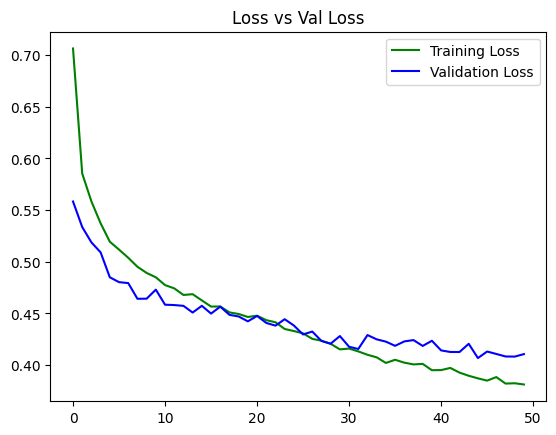

In [126]:
plt.plot(history.history['loss'], color='g', label='Training Loss')
plt.plot(history.history['val_loss'], color='b', label='Validation Loss')
plt.title("Loss vs Val Loss")
plt.legend()
plt.show()

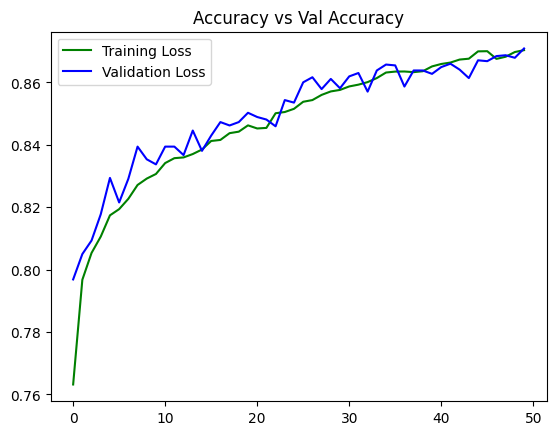

In [127]:
plt.plot(history.history['accuracy'], color='g', label='Training Loss')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Loss')
plt.title("Accuracy vs Val Accuracy")
plt.legend()
plt.show()

In [128]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test_scaled), axis=1)
print(classification_report(y_test, y_pred))

116/116 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1287
           1       0.86      0.93      0.89      1593
           2       0.00      0.00      0.00        49
           4       0.71      0.48      0.57       105
           5       0.60      0.52      0.56       243
           6       0.00      0.00      0.00         2
           7       0.67      0.67      0.67         3
           8       1.00      0.03      0.07        59
           9       0.73      0.77      0.75       346

    accuracy                           0.87      3687
   macro avg       0.62      0.49      0.50      3687
weighted avg       0.86      0.87      0.86      3687



c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
# model.save('classification.h5')